 # Predicting Lung Capacity with Linear Regression Model
 

## 0. Introduction

Lung Capacity is the volume of air in the lungs upon the maximum effort of inspiration.  Among healthy adults, the average lung capacity is about 6 liters. According to Delgado and Bajaj (2021),age, gender, body composition, and ethnicity are factors affecting the different ranges of lung capacity among individuals.

The objective of this project is to build a model that accurately predicts the lung capacity of person using the person's age [Age(years)], height [Height(inches)], whether the person is a smoker or not [Smoke], the person's gender [Gender],and if the person was born by Caesarean [Caesarean].

The data was gotten from [kaggle.com](https://www.kaggle.com/datasets/radhakrishna4/lung-capacity)

## 1. Prepare Data: Load, Preview, Explore and Split Data

### A. Load and Preview

In [58]:
# Import required libraries (others would be imported later on as the their need arises)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [81]:
df = pd.read_excel(r"C:\Users\HP\Downloads\CSVs/LungCap.xls") # Imports the CSV file as a pandas dataframe
df.head() # To preview the data (first five rows)

,LungCap(CC),Age(Years),Height(Inches),Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LungCap(CC)     725 non-null    float64
 1   Age(Years)      725 non-null    int64  
 2   Height(Inches)  725 non-null    float64
 3   Smoke           725 non-null    object 
 4   Gender          725 non-null    object 
 5   Caesarean       725 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


Observations:
- From the above information, it appears there are no missing values in the dataset.
- The dataset consists of three numerical features (LungCap(cc), Age( years), Height(inches) ) and three binary categorical features (Smoke, Gender, Caeserean).
- The dataset contains only 725 entries (which is fairly small)

### B. Explore

Taking a quick glance at the distribution of each variable or feature

In [83]:
# First, split the features by their datatypes
df_cat = df.select_dtypes(include="object").columns.to_list()
df_num = df.select_dtypes(exclude="object").columns.to_list()

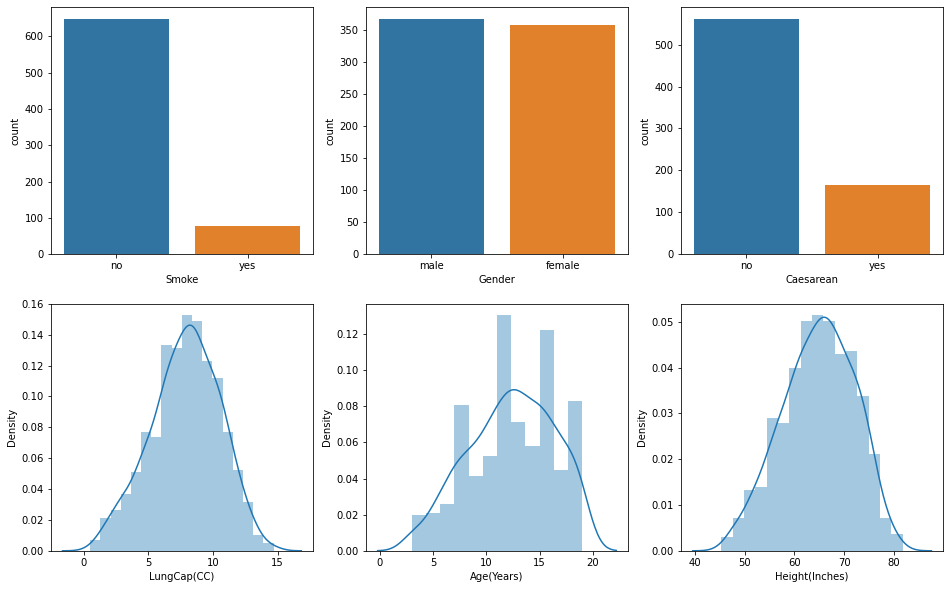

In [84]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# For the categorical features
j = 0
for i in df_cat:
    sns.countplot(i,data=df,ax=axes[0,j])
    j += 1
        
# For the numerical features
j = 0
for i in df_num:
    sns.distplot(df[i],ax=axes[1,j])
    j += 1
        
plt.show()

Observations:
- For the categorical features, both the 'Caeserean' and the 'Smoke' features seem unevenly distributed between the 'yes' and 'no' reponses. But the 'Gender' feature seem to be evenly distributed between the 'male' and 'female' responses.
- All three numerical features seem to be normally distributed about their means (indicated by the normal curve superimposed on them)

#### Let's take a closer look at each feature...

##### Smoke

In [15]:
df.Smoke.value_counts() # Computes frequency distribution of the 'smoke' variable 

no     648
yes     77
Name: Smoke, dtype: int64

To better comprehend the distribution, let's use its relative frequency (percentages), rather than the absolute frequency (simple value counts) as shown above

In [19]:
round(df.Smoke.value_counts(normalize=True)*100,1) # Computes relative frequency distribution of the 'Smoke' variable 

no     89.4
yes    10.6
Name: Smoke, dtype: float64

This can be visualized using a simple piechart:

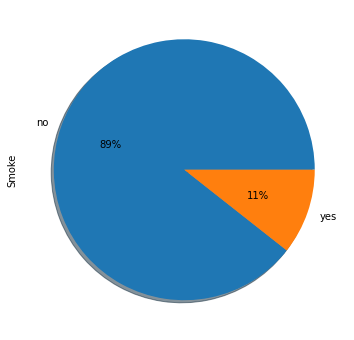

In [55]:
df.Smoke.value_counts().plot.pie(autopct = '%1.0f%%',shadow = True, figsize=(6,6)); # Plots pie chart of the 'Smoke' variable

Apparently, only 11% of the 725 people sampled are smokers.





##### Gender

In [36]:
df.Gender.value_counts() # Computes frequency distribution of the 'Gender' feature 

male      367
female    358
Name: Gender, dtype: int64

In [37]:
round(df.Gender.value_counts(normalize=True)*100,1) # Computes relative frequency distribution of the 'Gender' feature 

male      50.6
female    49.4
Name: Gender, dtype: float64

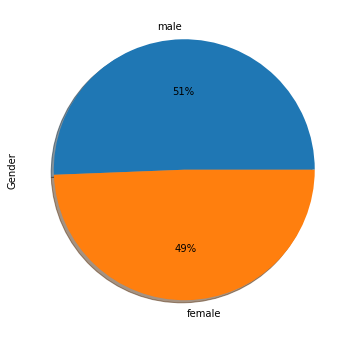

In [53]:
df.Gender.value_counts().plot.pie(autopct = '%1.0f%%',shadow = True, figsize=(6,6)); # Plots pie chart of the 'Smoke' variable

There is an almost even distribution between both genders.

##### Caesarean

In [39]:
df.Caesarean.value_counts()

no     561
yes    164
Name: Caesarean, dtype: int64

In [41]:
round(df.Caesarean.value_counts(normalize=True)*100,1)

no     77.4
yes    22.6
Name: Caesarean, dtype: float64

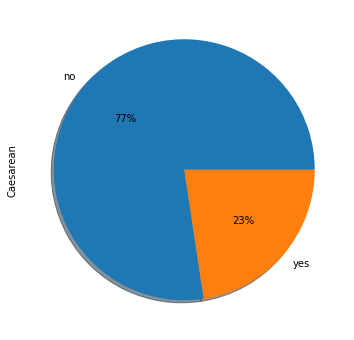

In [54]:
df.Caesarean.value_counts().plot.pie(autopct = '%1.0f%%',shadow = True, figsize=(6,6));

Only 23% were born by Caesarean.

##### LungCap, Age, Height

Unlike the categorical features explored and summarized above, numerical features can only be summarized using descriptives such as the mean, standard devaition, and the five summary statitics (min, q1, q2, q3, max)

In [85]:
round(df.describe(),2) # Computes the summary statistics of the numerical features

,LungCap(CC),Age(Years),Height(Inches)
count,725.00,725.00,725.00
mean,7.86,12.33,64.84
std,2.66,4.00,7.20
min,0.51,3.00,45.30
25%,6.15,9.00,59.90
50%,8.00,13.00,65.40
75%,9.80,15.00,70.30
max,14.68,19.00,81.80


Checking for skewness...

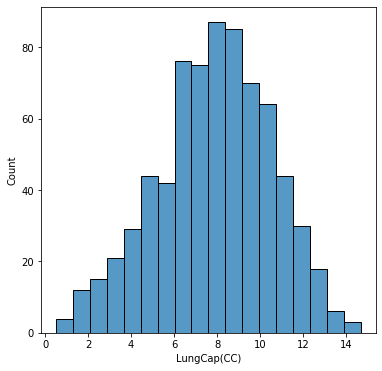

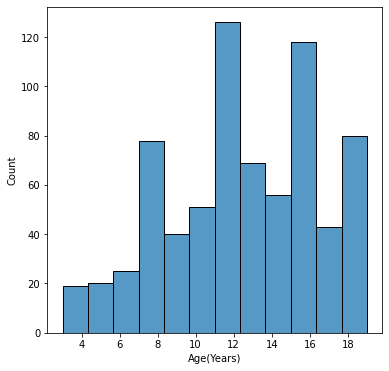

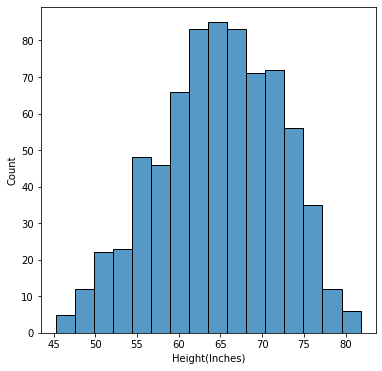

In [86]:
for i in df_num:
    plt.figure(figsize=(6,6))
    sns.histplot(data=df[i])

Of all three features, the 'age' feature seems to be slightly negatively skewed.

Checking with the skewness value should give a better picture

In [87]:
for i in df_num:
    print(f"The Skewness of {i} is", round(skew(df[i]),3))

The Skewness of LungCap(CC) is -0.227
The Skewness of Age(Years) is -0.257
The Skewness of Height(Inches) is -0.226


The skewness values (and the plots) above shows that LungCap, Age, and Height are slightly negatively skewed. However, we may check to see if outliers are reponsible for the skewness

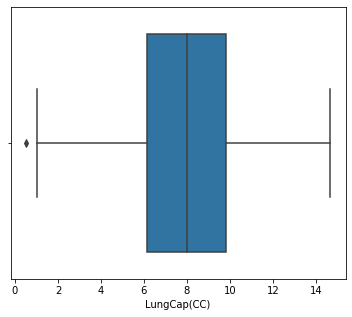

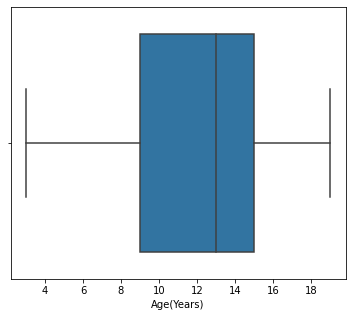

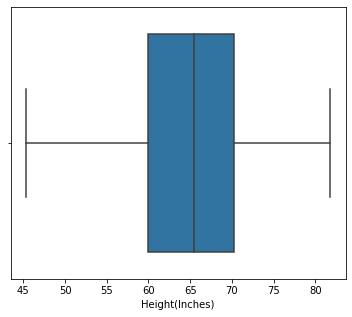

In [88]:
for i in df_num:
    plt.figure(figsize=(6,5))
    sns.boxplot(i, data=df)

Only LungCap seem to have an outlier. 

Let's remove the outlier and observe the skewness value...

In [91]:
# Locate the outlier entry
df.loc[df["LungCap(CC)"]<1]

,LungCap(CC),Age(Years),Height(Inches),Smoke,Gender,Caesarean
149,0.507,3,51.6,no,female,yes


In [92]:
df = df.drop(149, axis=0) # Drops the outlier

In [94]:
print(f"The Skewness of LungCap is", round(skew(df["LungCap(CC)"]),3))

The Skewness of LungCap is -0.213


From the recalculated value above, it is evident that the outlier has little or no significant effect on the skewness.

Though, univariate normality of the features isn't really an important issue in regression, however, the presence of outliers may cause potential problems for your model (see [Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)). Though outliers should generally never be removed from a sample unless there is good substantive (in addition to statistical) reason for doing so, the linear regression model assumes that there are no extreme observations that would otherwise contribute to gross misspecification of the fitted model (see Denis, Daniel J., 2015).

#### Multicolinearity Check

Since we intend to fit a regresion model to the data, it is just pertinent we check the numerical features for multicolinearity and drop such feature, if any.

In [207]:
df.corr() # Computes the correlation matrix of the numerical features

,LungCap(CC),Age(Years),Height(Inches)
LungCap(CC),1.000000,0.818164,0.912114
Age(Years),0.818164,1.000000,0.834900
Height(Inches),0.912114,0.834900,1.000000


Age and Height appear to be highly correlated (R = 0.834900) . One of them needs to be dropped to avoid the problem of multicolinearity [Read about multicollinearity here](https://en.wikipedia.org/wiki/Multicollinearity). Age would be dropped since it has lesser predictive power (R = 0.818164) compared to Height (R = 0.912114)

In [208]:
dfm = df.drop(columns="Age(Years)")
dfm.head()

,LungCap(CC),Height(Inches),Smoke,Gender,Caesarean
0,6.475,62.1,no,male,no
1,10.125,74.7,yes,female,no
2,9.550,69.7,no,female,yes
3,11.125,71.0,no,male,no
4,4.800,56.9,no,male,no


### C. Split Data

Here, we split the data into target (LungCap) and predictors (Age, Height, Smoke, Gender, Caeserean).




In [209]:
target = "LungCap(CC)"
X = dfm.drop(columns=target)
y = dfm[target]
print("Here's the first five rows of the taregt vector:")
print(y.rename("LungCap").head())
print()
print("Here's the first five rows of the predictor/feauture matrix:")
print(X.head())
print()
print()

Here's the first five rows of the taregt vector:
0     6.475
1    10.125
2     9.550
3    11.125
4     4.800
Name: LungCap, dtype: float64

Here's the first five rows of the predictor/feauture matrix:
   Height(Inches) Smoke  Gender Caesarean
0            62.1    no    male        no
1            74.7   yes  female        no
2            69.7    no  female       yes
3            71.0    no    male        no
4            56.9    no    male        no




Next is to perform a horizontal split, dividing the data into training set (80% of the data) and test set (20% of the data).

In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"The shape of X_train is {X_train.shape}, and the shape of X_test is {X_test.shape}")

The shape of X_train is (579, 4), and the shape of X_test is (145, 4)


Now, our data is ready to train the model :) 

## 2. Build Model

### A. Compute Baseline Score

To predict the value of any numerical outcome/variable, our best guess (though may be regarded as uneducated in this context) usually would be the average value of that variable (a.k.a mean or expected value). The standard deviation measures how far off on the average, the mean is from the actual value. A machine learning model is expected to perform better (in terms of accuracy) than a baseline model (in this case, the mean). Hence, the average deviation of the predicted values from the actual values is expected to be way lower than that of the  baseline model (the standard devaition).

The standard devation of the variable can also be called the root mean squared error of the baseline model, which we now seek to compute:

In [211]:
RMSE_baseline = np.std(y_train) # Computes the RMSE of the baseline model
print("Mean LungCap:", y_mean)
print("Baseline RMSE:", round(RMSE_baseline,2))

Mean LungCap: 7.874093264248702
Baseline RMSE: 2.66


### B. Train Model

In [243]:
# Import required libraries to buld the model
from sklearn.pipeline import make_pipeline
from category_encoders import BinaryEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Build model via pipeline
model_lr = make_pipeline(
            BinaryEncoder(),
            StandardScaler(),
            LinearRegression()
                     )
# Fit the model to the training set
model_lr.fit(X_train, y_train)

Pipeline(steps=[('binaryencoder',
                 BinaryEncoder(cols=['Smoke', 'Gender', 'Caesarean'],
                               mapping=[{'col': 'Smoke',
                                         'mapping':     Smoke_0  Smoke_1
 1        0        1
 2        1        0
-1        0        0
-2        0        0},
                                        {'col': 'Gender',
                                         'mapping':     Gender_0  Gender_1
 1         0         1
 2         1         0
-1         0         0
-2         0         0},
                                        {'col': 'Caesarean',
                                         'mapping':     Caesarean_0  Caesarean_1
 1            0            1
 2            1            0
-1            0            0
-2            0            0}])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

### C. Evaluate Model

Now that our model has been fitted to the data, let's see how well it peformed against the baseline model aforementioned.

In [244]:
from sklearn.metrics import mean_squared_error

y_train_pred = model_lr.predict(X_train) # Returns the model's 'y' estimates
RMSE_Trained = np.sqrt(mean_squared_error(y_train,y_train_pred)) # Computes the RMSE of the trained model
print("Baseline RMSE:", round(RMSE_baseline,2))
print("The trained model RMSE:", round(RMSE_Trained,2))

Baseline RMSE: 2.66
The trained model RMSE: 1.05


It is safe to say that our trained model outperforms the baseline model.

Next, let's see how well the model can generalize over the test set...

In [245]:
y_test_pred = model_lr.predict(X_test) # Returns the test set's 'y' estimeates
RMSE_Test = np.sqrt(mean_squared_error(y_test,y_test_pred))
print("The test set RMSE:", round(RMSE_Test,2))

The test set RMSE: 1.13


Based on the RMSE metric, our model seems to be generalizing well enough.

Alternatively, we could check for accuracy using the model accuracy score that ranges from 0 - 1

In [246]:
print("The model's accuracy score on the training set is", model_lr.score(X_train,y_train).round(2))
print("The model's accuracy score on the test set is", model_lr.score(X_test,y_test).round(2))

The model's accuracy score on the training set is 0.84
The model's accuracy score on the test set is 0.81


The above implies that the model has an accuracy score of 84% on the training set, and 81% on the test set.

#### Linear Regression Assumption Tests

To ensure the model's reliabilty, we need to check that the linear regression assumptions are not violated...

Before testing the assumption, the model would be retrained on the full dataset.


In [247]:
# Build model via pipeline
full_model = make_pipeline(
            BinaryEncoder(),
            StandardScaler(),
            LinearRegression()
                     )
# Fit the model to the training set
full_model.fit(X, y)


Pipeline(steps=[('binaryencoder',
                 BinaryEncoder(cols=['Smoke', 'Gender', 'Caesarean'],
                               mapping=[{'col': 'Smoke',
                                         'mapping':     Smoke_0  Smoke_1
 1        0        1
 2        1        0
-1        0        0
-2        0        0},
                                        {'col': 'Gender',
                                         'mapping':     Gender_0  Gender_1
 1         0         1
 2         1         0
-1         0         0
-2         0         0},
                                        {'col': 'Caesarean',
                                         'mapping':     Caesarean_0  Caesarean_1
 1            0            1
 2            1            0
-1            0            0
-2            0            0}])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [248]:
print("The model's accuracy score is", full_model.score(X,y).round(2))

The model's accuracy score is 0.84


##### Assumption 1: Linearity Assumption

**Linearity:** Assumes that there is a linear relationship between the predictors and the response variable. If not, either a quadratic term or another algorithm should be used.
   

In [219]:

def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [220]:
def linear_assumption(model, features, label):
    
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


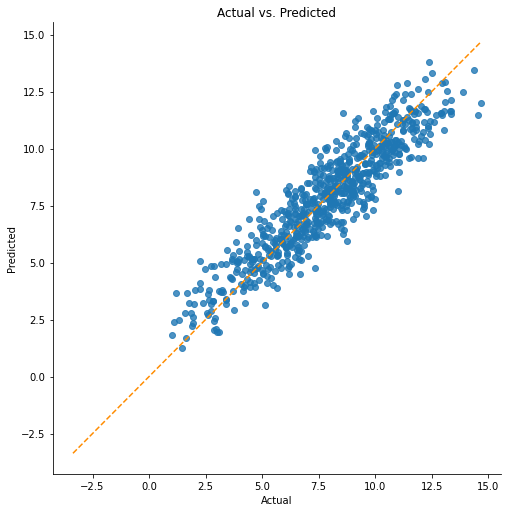

In [221]:
linear_assumption(full_model, X, y)

Assumption satisfied.

##### Assumption 2: Normality of the Error Terms

**Normality:** Assumes that the error terms are normally distributed. If they are not, nonlinear transformations of variables may solve this. This assumption being violated primarily causes issues with the confidence intervals
   

In [222]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied.')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.565581427947109
Residuals are normally distributed


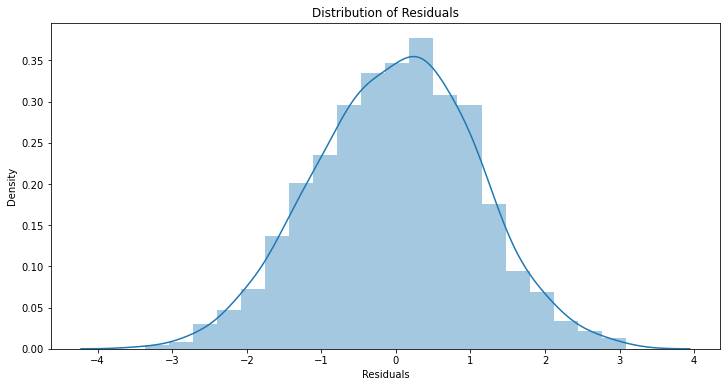


Assumption satisfied.


In [223]:
normal_errors_assumption(full_model, X, y)

##### Assumption 3: No Multicollinearity among Predictors

This assumption test would be skipped as it has already been checked and satisfied earlier on.

##### Assumption 4: No Autocorrelation of the Error Terms

**Autocorrelation:** Assumes that there is no autocorrelation in the residuals. If there is autocorrelation, then there is a pattern that is not explained due to the current value being dependent on the previous value. This may be resolved by adding a lag variable of either the dependent variable or some of the predictors.
  

In [224]:
def autocorrelation_assumption(model, features, label):
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [225]:
autocorrelation_assumption(full_model, X, y)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.9250423959793554
Little to no autocorrelation 

Assumption satisfied


##### Assumption 5: Homoscedasticity

**Homoscedasticity:** Assumes that the errors exhibit constant variance
   

In [226]:
def homoscedasticity_assumption(model, features, label):
    
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


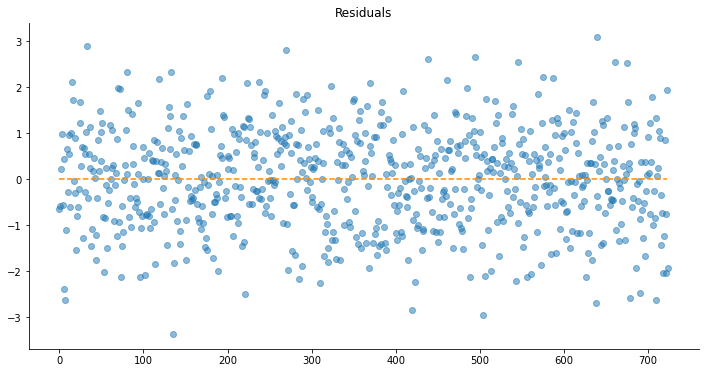

In [227]:
homoscedasticity_assumption(full_model, X, y)

Residuals appear to be uniformly distributed.

Assumption satisfied.

## 3. Communicate Result

To get the full regression output summary, we will need the Statsmodels package.

In [253]:
df3 = df.copy() # Makes a copy of the original data to be retrained using StatsModels
le = LabelEncoder() # Instantiates categorical label encoder
ss = StandardScaler() # Instantiates standard scaler
df3["Smoke"] = le.fit_transform(df3["Smoke"]) # Fits and Transforms the 'Smoke' feature to 1s (yes) and 0s (no)
df3["Gender"] = le.fit_transform(df3["Gender"]) # Fits and Transforms the 'Gender' feature to 1s (male) and 0s (female)
df3["Caesarean"] = le.fit_transform(df3["Caesarean"]) # Fits and Transforms the 'Caesarean' feature to 1s (yes) and 0s (no)

df3[df_num] = ss.fit_transform(df3[df_num]) # Fits and Transforms the numerical features to standard z-scores to normalize them
df3.drop(columns="Age(Years)", inplace=True) # Drops the leaky feature

# Split data in into target (or label) and features (or predictors)
X1 = df3.drop(columns=target) 
y1 = df3[target]

import statsmodels.api as sm # Imports the statsmodels package

#fit linear regression model
model = sm.OLS(y1, X1).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            LungCap(CC)   R-squared (uncentered):                   0.838
Model:                            OLS   Adj. R-squared (uncentered):              0.837
Method:                 Least Squares   F-statistic:                              929.8
Date:                Sun, 28 Aug 2022   Prob (F-statistic):                   1.22e-282
Time:                        18:05:43   Log-Likelihood:                         -368.83
No. Observations:                 724   AIC:                                      745.7
Df Residuals:                     720   BIC:                                      764.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

### In summary...




Standard multiple regression was conducted to determine the accuracy of the independent variables
(the individual's age in years _[Age(Years)]_; the individual's height in inches _[Height(Inches)]_; whether the person smokes or not _[Smoke]_;
the individual's sex _[Gender]_; and whether the individual was born via Caesarean or not _[Caesarean]_) predicting the individual's lung capacity _[LungCap (CC)]_. Data screening and exploration led to the elimination of a case (a percieved outlier) and a feature - _[Age(Years)]_ (multicollinearity issue). The model was built via a pipeline, which first feeds the categorical features (_[Smoke]_, _[Gender]_, and _[Caesarean]_)  into a binary encoder that converts the _'Yes'_ and _'No'_ into 1s and 0s, and then every other feature in to standard scaler, and then finally into the instantiated regression model . Regression results indicate that the overall model significantly predicts lung capacity [R2 = 0.838, R2
adj = 0.837, F(4, 720) = 929.8, p < .001]. This model accounts for 83.8% of
variance in lung capacity. A summary of regression coefficients is presented in the table below and
indicates that all four features (_Height(Inches)_, _Smoke_, _Gender_, and _Caesarean_) entered into the model significantly contributed
to the model.

<table ><tr><th> <th><th> coef <th><th> std err <th><th> t <th><th> p-value <th><th> [0.025 <th><th> 0.975] <tr><tr>
<tr><td> Height(Inches) <td><td> 0.9193 <td><td> 0.015 <td><td> 60.260 <td><td> 0.000 <td><td> 0.000 <td><td> 0.949 <td><tr><tr><td> Smoke <td><td> -0.1889 <td><td> 0.048  <td><td> -3.947 <td><td> 0.000 <td><td>  -0.283 <td><td>  -0.283 <td><tr><tr><td> Gender <td><td> 0.0720 <td><td> 0.023 <td><td> 3.162 <td><td> 0.002 <td><td> 0.027<td><td> 0.117 <td><tr>
<tr><td> Caesarean <td><td> -0.0717 <td><td> 0.034 <td><td> -2.107 <td><td> 0.036 <td><td> -0.138 <td><td> -0.005 <td><tr><table>

### References

- _Anscombe's quartet_ (2022). Retrieved August 28, 2022, from https://en.wikipedia.org/wiki/Anscombe%27s_quartet
- Delgado and Bajaj (2021). _Physiology of Lung Capacity._ Retrieved August 28, 2022, from https://www.ncbi.nlm.nih.gov/books/NBK541029/#:~:text=Lung%20capacity%20or%20total%20lung,of%20lung%20capacity%20among%20individuals.
- Denis, D. J. (2015). _Applied univariate, bivariate, and multivariate statistics._ John Wiley & Sons.
- Macaluso, J. (2018). _Testing Linear Regression Assumptions in Python._ Retrieved August 28, 2022, from https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/
- _Multicollinearity_ (2022). Retrieved August 28, 2022, from https://en.wikipedia.org/wiki/Multicollinearity


#### Mustapha, M. K.
LinkedIn: [Kola Mustapha](https://www.linkedin.com/in/kola-mustapha-27037856/)

Email: mustapha.mk@outlook.com

Thanks for reading.